## Simulation of Stochastic Differential Equations
This script focuses on creating a python class SDE used to simulate important stochastic differential equations, such as Arithmetic Brownian Motion, Geometric Brownian Motion and the Ornstein-Uhlenbeck process

In [123]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Input Parameters

In [124]:
npaths = 20000 #The number of paths generated
T = float(1) #The time horizons
nsteps = 200 #The number of time steps
dt = T/nsteps #The size of a single time step
t = np.linspace(0,T,nsteps) #total time vector
mu = -0.05 #mean 
sigma = 0.4 #standard deviation
S0 = 1 #Starting asset price

The following will be the class SDE, through which it will be possible to generate and simulate various stochastic differential equations

In [160]:
class SDE(object):
    '''
    Stochastic Differential Equation Class
    Current Supported SDEs:
    - Arithmetic Brownian Motion = 'abm'
    - Geometric Brownian Motion = 'gbm'
    - Ornstein-Uhlenbeck Process = 'oup'
    '''
    def __init__(self, process='abm', npaths=200, 
                 T=float(1), nsteps=200, mu=-0.05, 
                 sigma=0.4, S0=1, alpha=5):
        self.process = process
        self.npaths = npaths
        self.T = T
        self.nsteps = nsteps
        self.mu = mu
        self.sigma = sigma
        self.dt = T/nsteps
        self.t = np.linspace(0,T,nsteps)
        self.S0 = S0
        self.alpha = alpha
        
    def simulate(self, plot=False, n_paths=20, return_vector=False):
        '''
        plot - whether a plot should be generated for the first n paths
        n_paths - the amount of paths which should be plotted out
        return_vector - option to return vector of paths
        '''
        if self.process == 'abm':
            '''
            Arithmetic Brownian Motion
            '''
            dX = self.mu*dt + self.sigma*np.random.randn(self.npaths,self.nsteps)*np.sqrt(self.dt)
            X = np.zeros(self.npaths)
            X = self.S0 + np.cumsum(dX, axis=1)
            EX = self.S0 + self.mu*self.t #expected path
            if plot:
                indexes = np.arange(n_paths)
                if len(indexes) < npaths:
                    plt.figure(figsize=(8,6))
                    for i in indexes:
                        plt.plot(self.t, X[i], linewidth=0.7)
                    plt.plot(self.t, EX, color='red',
                            label=r'Expected $\mu={}, \sigma={}$'.format(self.mu, self.sigma), 
                             linestyle='-', linewidth=1.5)
                    #plt.ylim([-1,1])
                    plt.legend()
                    plt.title('Simulated paths from Arithmetic Brownian Motion')
                else:
                    for i in self.npaths:
                        plt.plot(X[i], linewidth=0.7)
                        plt.title('Simulated paths from Arithmetic Brownian Motion')
            if return_vector:
                return X
        elif self.process == 'gbm':
            '''
            Geometric Brownian Motion
            '''
            #creating the increments
            dX = (self.mu-0.5*self.sigma**2)*self.dt + self.sigma*np.sqrt(self.dt)*np.random.randn(self.npaths, self.nsteps)
            X = np.cumsum(dX, axis=1) #accumulating increments
            S = self.S0*np.exp(X) #transforming geometric brownian motion
            EX = self.S0*np.exp(self.mu*self.t) #expected path
            if plot:
                indexes = np.arange(n_paths)
                if len(indexes) < npaths:
                    plt.figure(figsize=(8,6))
                    for i in indexes:
                        plt.plot(self.t, S[i,:], linewidth=0.7)
                    plt.plot(self.t, EX, color='red',
                            label=r'Expected $\mu={}, \sigma={}$'.format(self.mu, self.sigma),
                            linestyle='-', linewidth=1.5)
                    #plt.ylim([-1,1])
                    plt.legend()
                    plt.title('Simulated paths from Geometric Brownian Motion')
                else:
                    for i in self.npaths:
                        plt.plot(S[i,:], linewidth=0.7)
                        plt.title('Simulated paths from Geometric Brownian Motion')
            if return_vector:
                return S
            
        elif self.process == 'oul':
            '''
            Ornstein-Uhlenbeck mean-reverting process - used in Vasicek interest rate model
            '''
            t = np.linspace(0, self.T, self.nsteps+1)
            X = np.zeros(shape=(self.nsteps+1, self.npaths))
            X[0,:] = self.S0
            #Sampling standard gaussian random numbers
            N = np.random.randn(self.nsteps, self.npaths)
            #Computing standard deviation for one time step
            sdev = self.sigma*np.sqrt((1-np.exp(-2*self.alpha*self.dt))/(2*self.alpha))
            #Computing and accumulating increments
            for i in range(self.nsteps):
                #Euler with analytic moments
                X[i+1,:] = self.mu+(X[i,:]-self.mu)*np.exp(-self.alpha*self.dt) + sdev*N[i,:]
                #Expected path
                EX = self.mu+(self.S0-self.mu)*np.exp(-self.alpha*t)
            if plot:
                indexes = np.arange(n_paths)
                if len(indexes) < npaths:
                    plt.figure(figsize=(8,6))
                    for i in indexes:
                        plt.plot(t, X[:,i], linewidth=0.7)
                    plt.plot(t, EX, color='red',
                            label=r'Expected $\mu={}, \sigma={}, \alpha={}$'.format(self.mu, 
                                                                                   self.sigma,
                                                                                   self.alpha),
                            linestyle='-', linewidth=1.5)
                    plt.legend()
                    plt.title('Simulated paths from Ornstein-Uhlenbeck Process')
                else:
                    for i in self.npaths:
                        plt.plot(t, X[:,i], linewidth=0.7)
                        plt.title('Simulated paths from Ornstein-Uhlenbeck Process')
            if return_vector:
                return X
        else:
            raise Exception('The process you are trying to simulate is inexistent or has not been implemented yet')
       

### Simulation
Simulating the different Stochastic Differential Equations from the class created

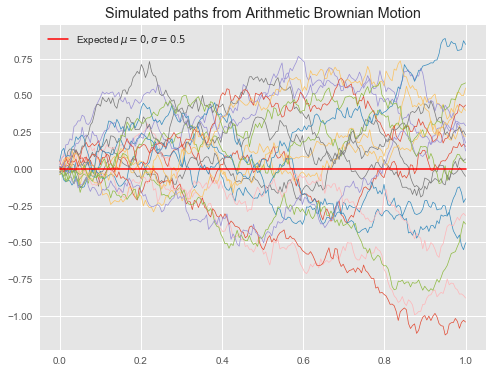

In [161]:
#Arithmetic Brownian Motion
sde_abm = SDE(process='abm', mu=0, sigma=0.5, S0=0)
sde_abm.simulate(plot=True, return_vector=False)

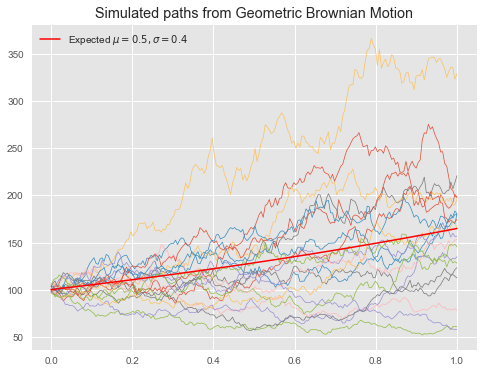

In [162]:
#Geometric Brownian Motion
sde_gbm = SDE(process='gbm', mu=0.5, S0 = 100)
sde_gbm.simulate(plot=True, return_vector=False)

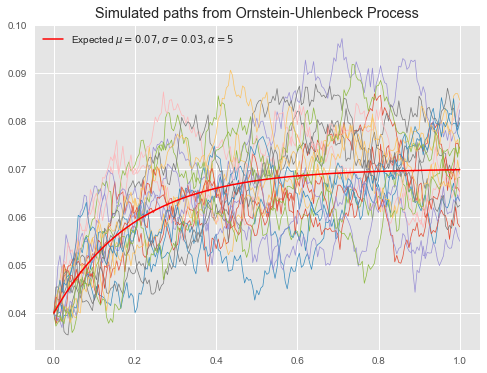

In [163]:
sde_oul = SDE(process='oul', mu=0.07, sigma=0.03, S0=0.04)
sde_oul.simulate(plot=True, return_vector=False, n_paths=20)